In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect("./backup/database_2024-08-12_09-23-18.db")

sql = """
SELECT *
FROM Termin
INNER JOIN BuergerBuero ON Termin.buergerbuero = BuergerBuero.stadtteil;
-- WHERE BuergerBuero.stadt = 'Duesseldorf';
"""

df = pd.read_sql_query(sql, conn, parse_dates=["datum", "erstmalsErfasstAlsFrei", "erstmalsErfasstAlsBelegt"])

In [89]:
df["weekday"] = df["datum"].dt.weekday
df["hour"] = df["datum"].dt.hour

df['timeUntilTermin'] = df['datum'] - df['erstmalsErfasstAlsFrei']

In [125]:
df['timeUntilTermin'].sort_values()

2071     0 days 00:07:12.451252
1978     0 days 00:07:12.451252
2355     0 days 00:07:12.451252
2257     0 days 00:07:12.451252
560      0 days 00:07:55.298544
                 ...           
7571   117 days 11:45:57.226050
7572   117 days 12:00:57.226050
7573   117 days 12:15:57.226050
7574   117 days 12:30:57.226050
7575   117 days 12:45:57.226050
Name: timeUntilTermin, Length: 10161, dtype: timedelta64[ns]

In [126]:
df['timeUntilTermin'].mean()

Timedelta('18 days 21:32:10.657875535')

<Axes: xlabel='stadt'>

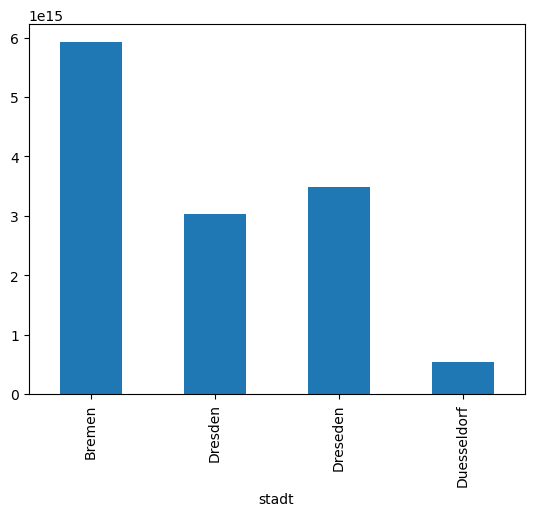

In [127]:
# plot time until termin per city
df.groupby("stadt")["timeUntilTermin"].mean().plot(kind="bar")

<Axes: >

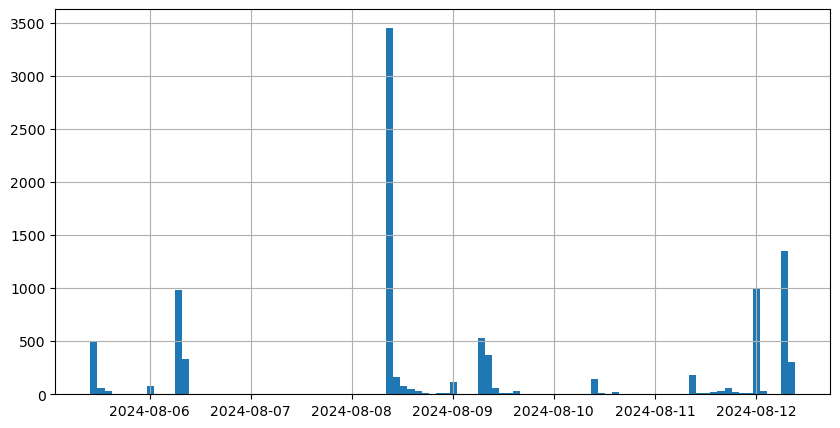

In [128]:
# histogram
df['erstmalsErfasstAlsFrei'].hist(bins=100, figsize=(10, 5))

Text(0, 0.5, 'Anzahl der verfügbaren Termine')

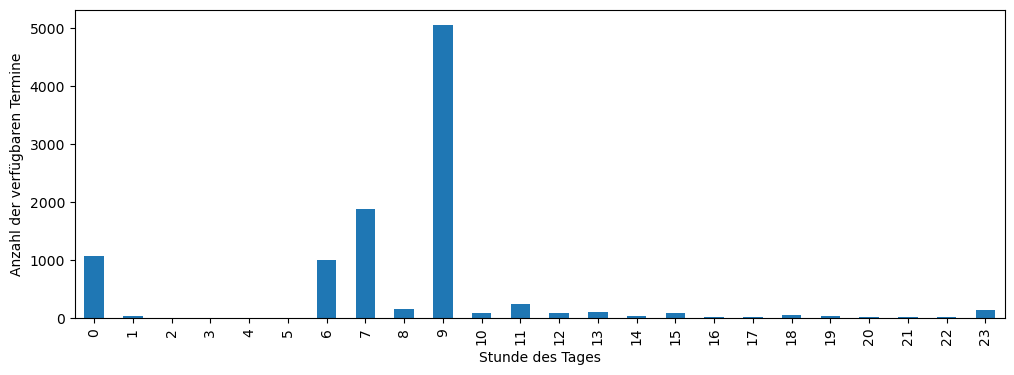

In [129]:
fig, axs = plt.subplots(figsize=(12,4))

# group by hour of the day
df.groupby(df['erstmalsErfasstAlsFrei'].dt.hour).size().plot(kind='bar', ax=axs)

plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der verfügbaren Termine')

Text(0, 0.5, 'Anzahl der verfügbaren Termine')

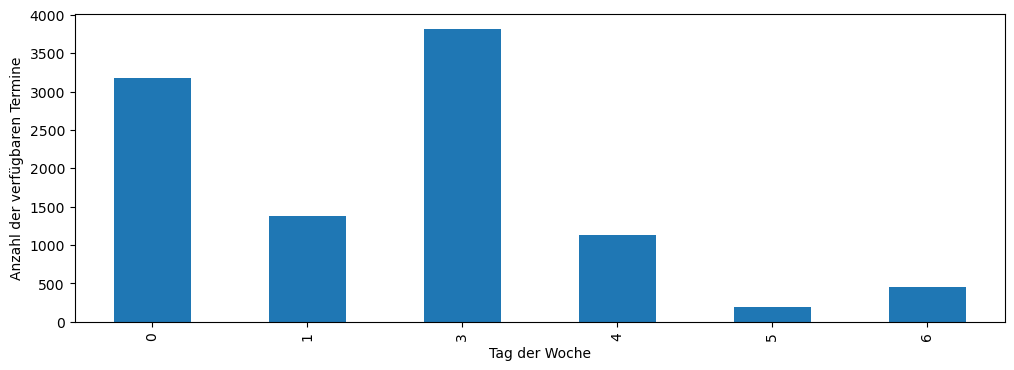

In [130]:
fig, axs = plt.subplots(figsize=(12,4))


axs.set_xticks(range(7))
axs.set_xticklabels(['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'])

df.groupby(df['erstmalsErfasstAlsFrei'].dt.dayofweek).size().plot(kind='bar', ax=axs)

plt.xlabel('Tag der Woche')
plt.ylabel('Anzahl der verfügbaren Termine')